In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\PC\\Desktop\\python'

In [3]:
movies = pd.read_csv("p4-Movie-Ratings.csv")

In [12]:
len(movies)

559

In [13]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [4]:
movies.columns =['Film', 'Genre', 'CriticRating', 'AudienceRating', \
                 'BudgetMillions', 'Year']

In [15]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
# we notice that the year is in integer and we dont want it to be so. year is suppose to be a categorical variable

In [5]:
# To change the object variable into category variable
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [41]:
# to check for unique characters of the columns
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [14]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
# JointPlots

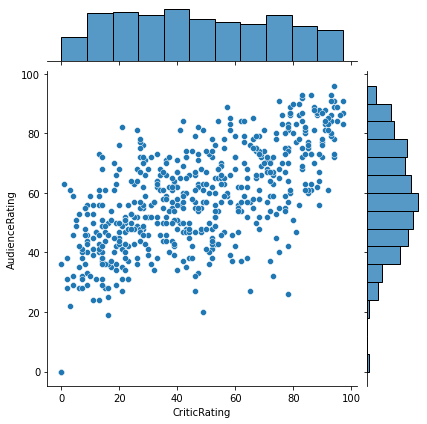

In [17]:
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating')

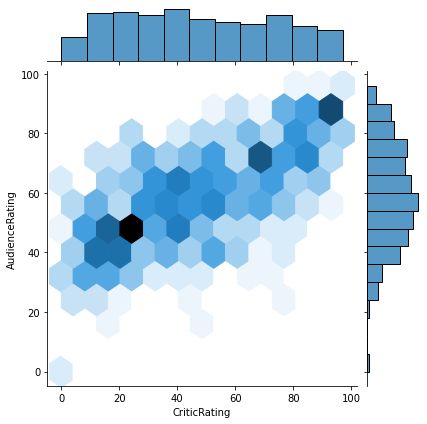

In [18]:
# if we press shift tab, we see that the kind is in scatter which is the default. we can change it to another kind 
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'hex')

---

In [19]:
# Histogram

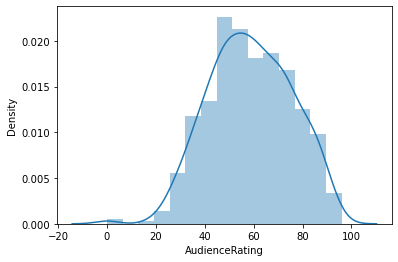

In [21]:
# from previous lesson, to plot a histogram
ml = sns.distplot(movies.AudienceRating, bins = 15)

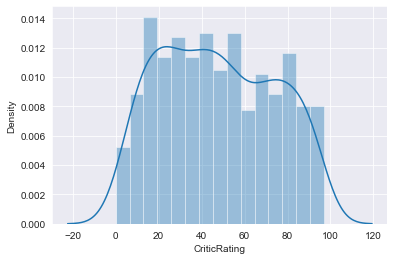

In [25]:
sns.set_style('darkgrid')
ml2 = sns.distplot(movies.CriticRating, bins = 15)

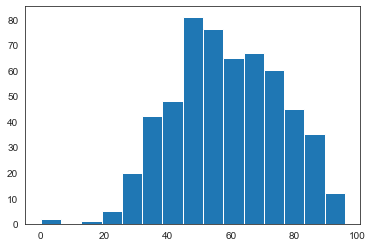

In [26]:
# to plot with pyplot
sns.set_style('white')
n1 = plt.hist(movies.AudienceRating, bins = 15)

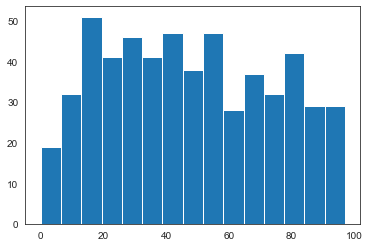

In [27]:
sns.set_style('white')
n2 = plt.hist(movies.CriticRating, bins = 15)

---

In [28]:
# stacked histograms

(array([237., 162.,  75.,  28.,  17.,  20.,  13.,   3.,   3.,   1.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <BarContainer object of 10 artists>)

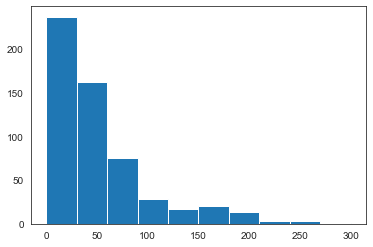

In [29]:
plt.hist(movies.BudgetMillions)

<function matplotlib.pyplot.show(close=None, block=None)>

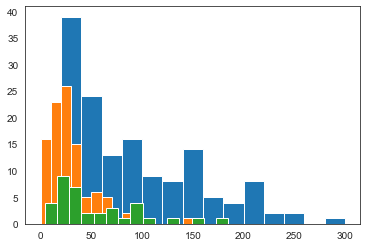

In [33]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins = 15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

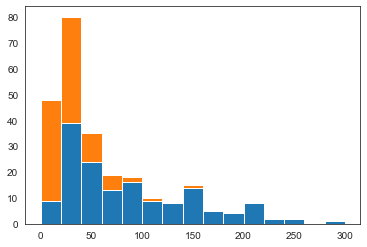

In [35]:
# to create stack, we create a list
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,\
          movies[movies.Genre == 'Drama'].BudgetMillions], \
         stacked = True, bins = 15)
plt.show

In [36]:
# if we have plenty genre, instead of adding them manually, we can create a loop

In [42]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

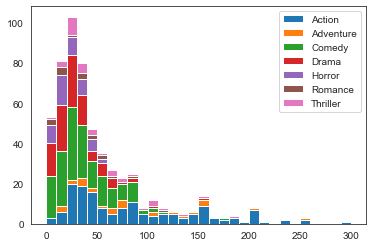

In [43]:
h = plt.hist(list1, bins =30, stacked = True, rwidth = 1, label = mylabels)
plt.legend()
plt.show()

---

In [44]:
# KDE plot

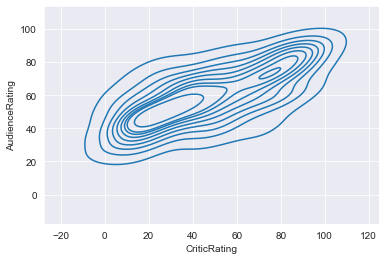

In [46]:
sns.set_style('darkgrid')
k1 =sns.kdeplot(movies.CriticRating, movies.AudienceRating)

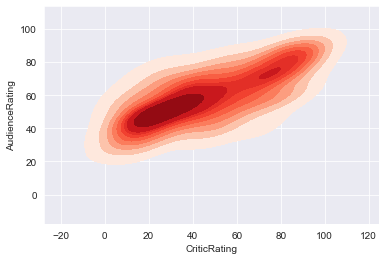

In [48]:
k1 =sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest = False, cmap = 'Reds')

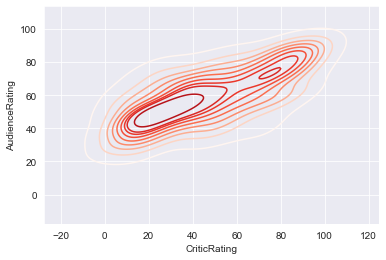

In [49]:
# to get just the outline
k1b = k1 =sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap = 'Reds')

---

In [1]:
# subplots
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

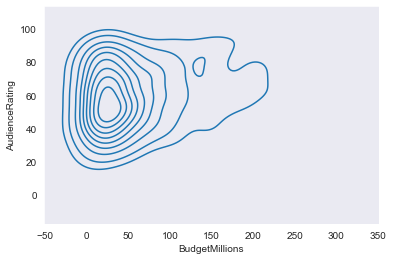

In [20]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

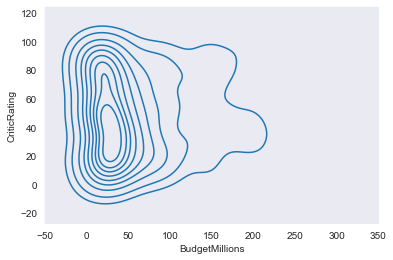

In [21]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

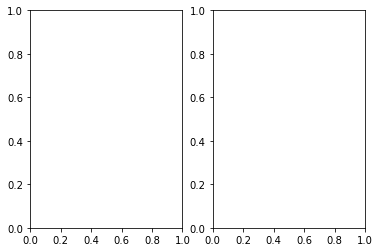

In [7]:
# to run a subplot creating two columns
f, ax = plt.subplots(1, 2)

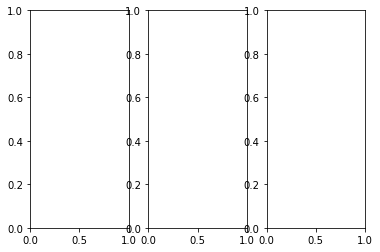

In [9]:
# to run a subplot creating 3 columns
f, ax = plt.subplots(1, 3)

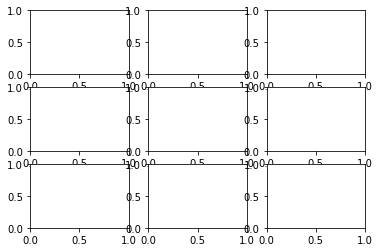

In [10]:
# to run a subplot creating 3 rows and 3 columns
f, ax = plt.subplots(3, 3)

In [11]:
# to adjust the size, use figsize

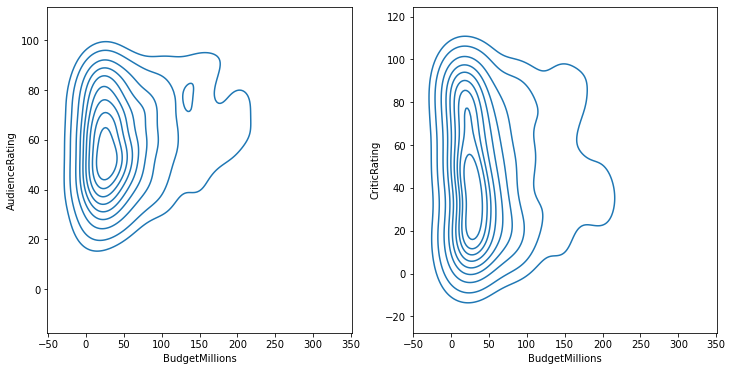

In [12]:
f, axes = plt.subplots(1, 2, figsize = (12, 6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[1])

In [13]:
# to check axes
axes

array([<AxesSubplot:xlabel='BudgetMillions', ylabel='AudienceRating'>,
       <AxesSubplot:xlabel='BudgetMillions', ylabel='CriticRating'>],
      dtype=object)

[(-20.0, 160.0)]

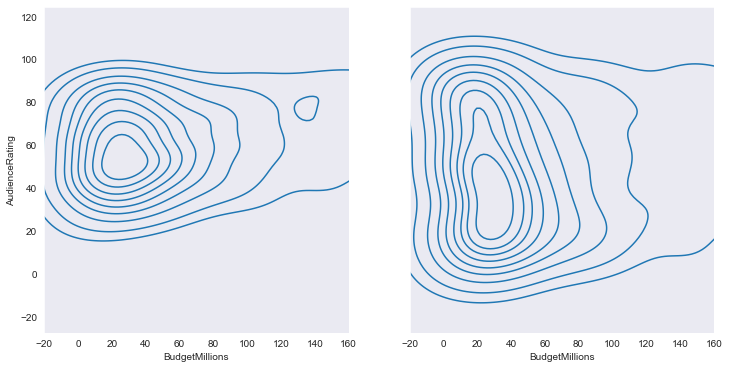

In [16]:
sns.set_style('dark')
f, axes = plt.subplots(1, 2, figsize = (12, 6), sharex = True, sharey = True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[1])
k1.set(xlim = (-20 , 160))

---

In [17]:
# violinplot vs boxplot

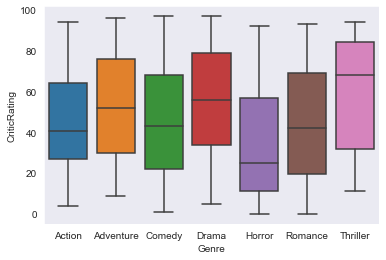

In [19]:
# boxplot
w = sns.boxplot(data = movies, x = 'Genre', y = 'CriticRating')

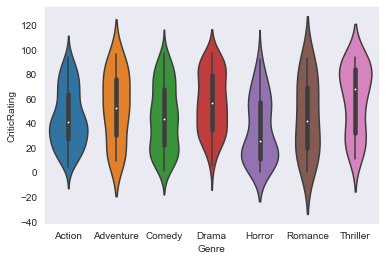

In [18]:
#violinplot
z = sns.violinplot(data = movies, x = 'Genre', y = 'CriticRating')

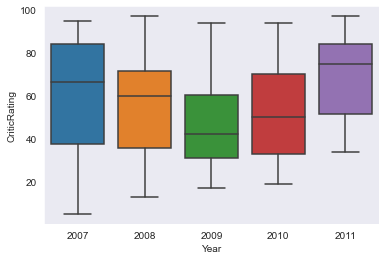

In [20]:
w1 =  sns.boxplot(data = movies[movies.Genre == 'Drama'], x = 'Year', y = 'CriticRating')

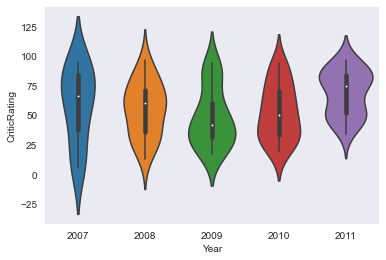

In [21]:
z1 = sns.violinplot(data = movies[movies.Genre == 'Drama'], x = 'Year', y = 'CriticRating')

---

In [22]:
# creating a facet grid

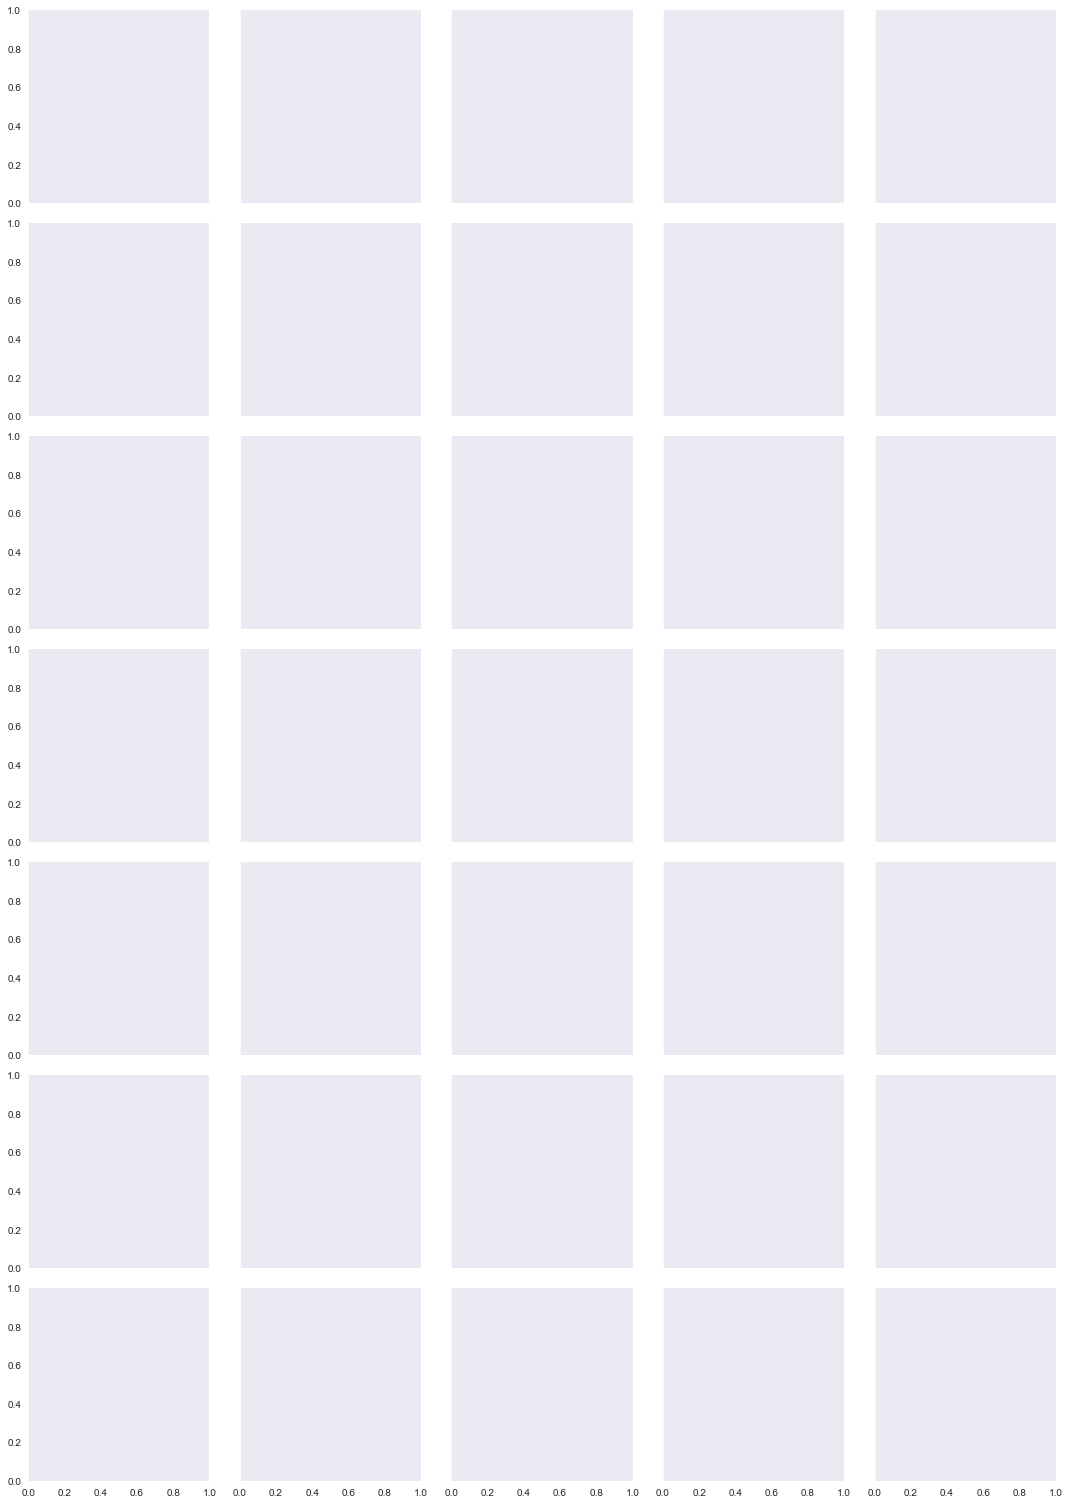

In [23]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

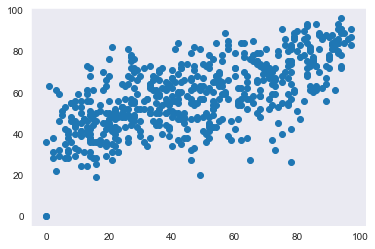

In [24]:
plt.scatter(movies.CriticRating, movies.AudienceRating) # then put it into the g variable of facet grid

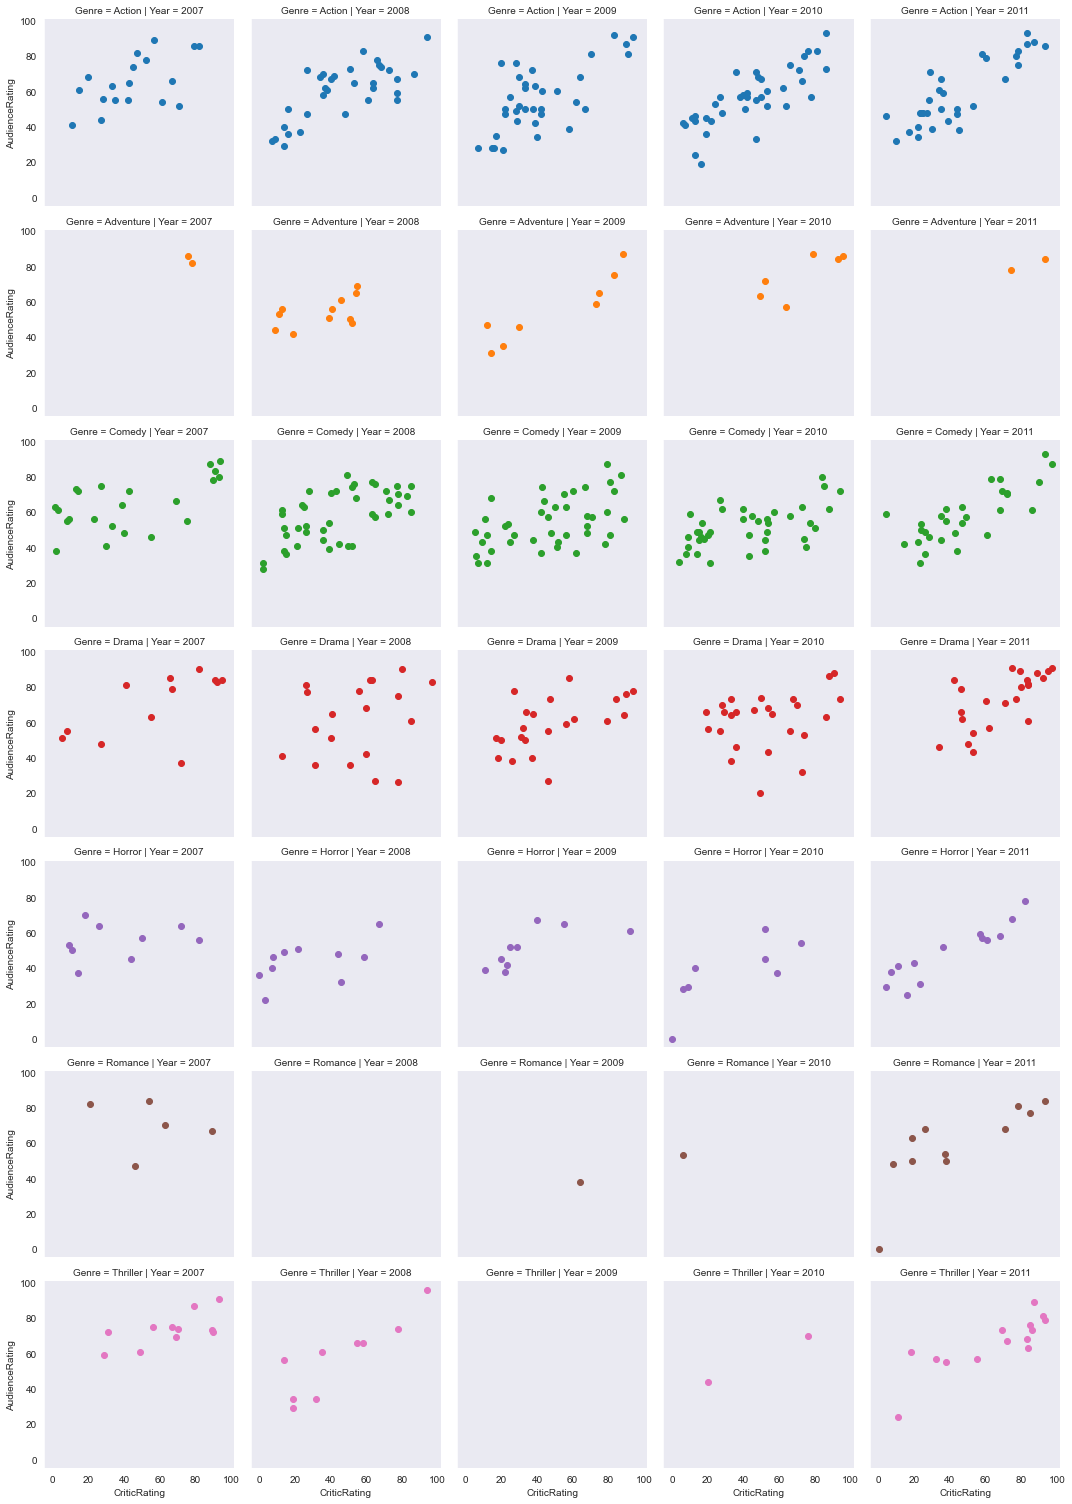

In [25]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

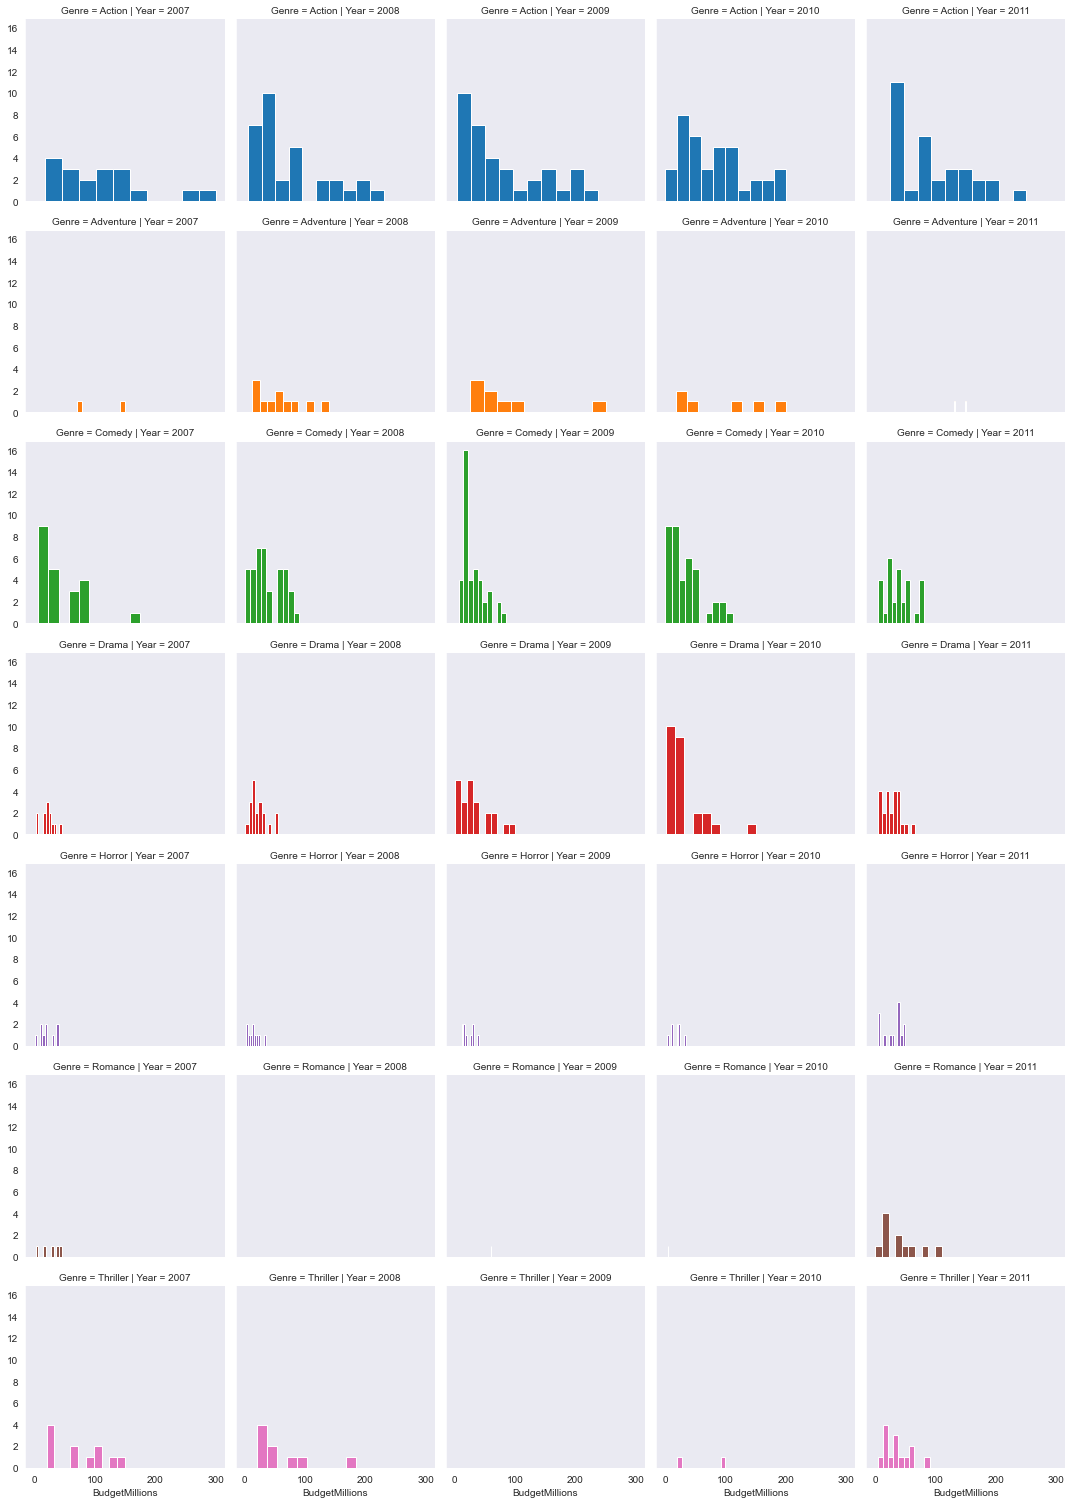

In [26]:
# to populate the facet with histogram
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

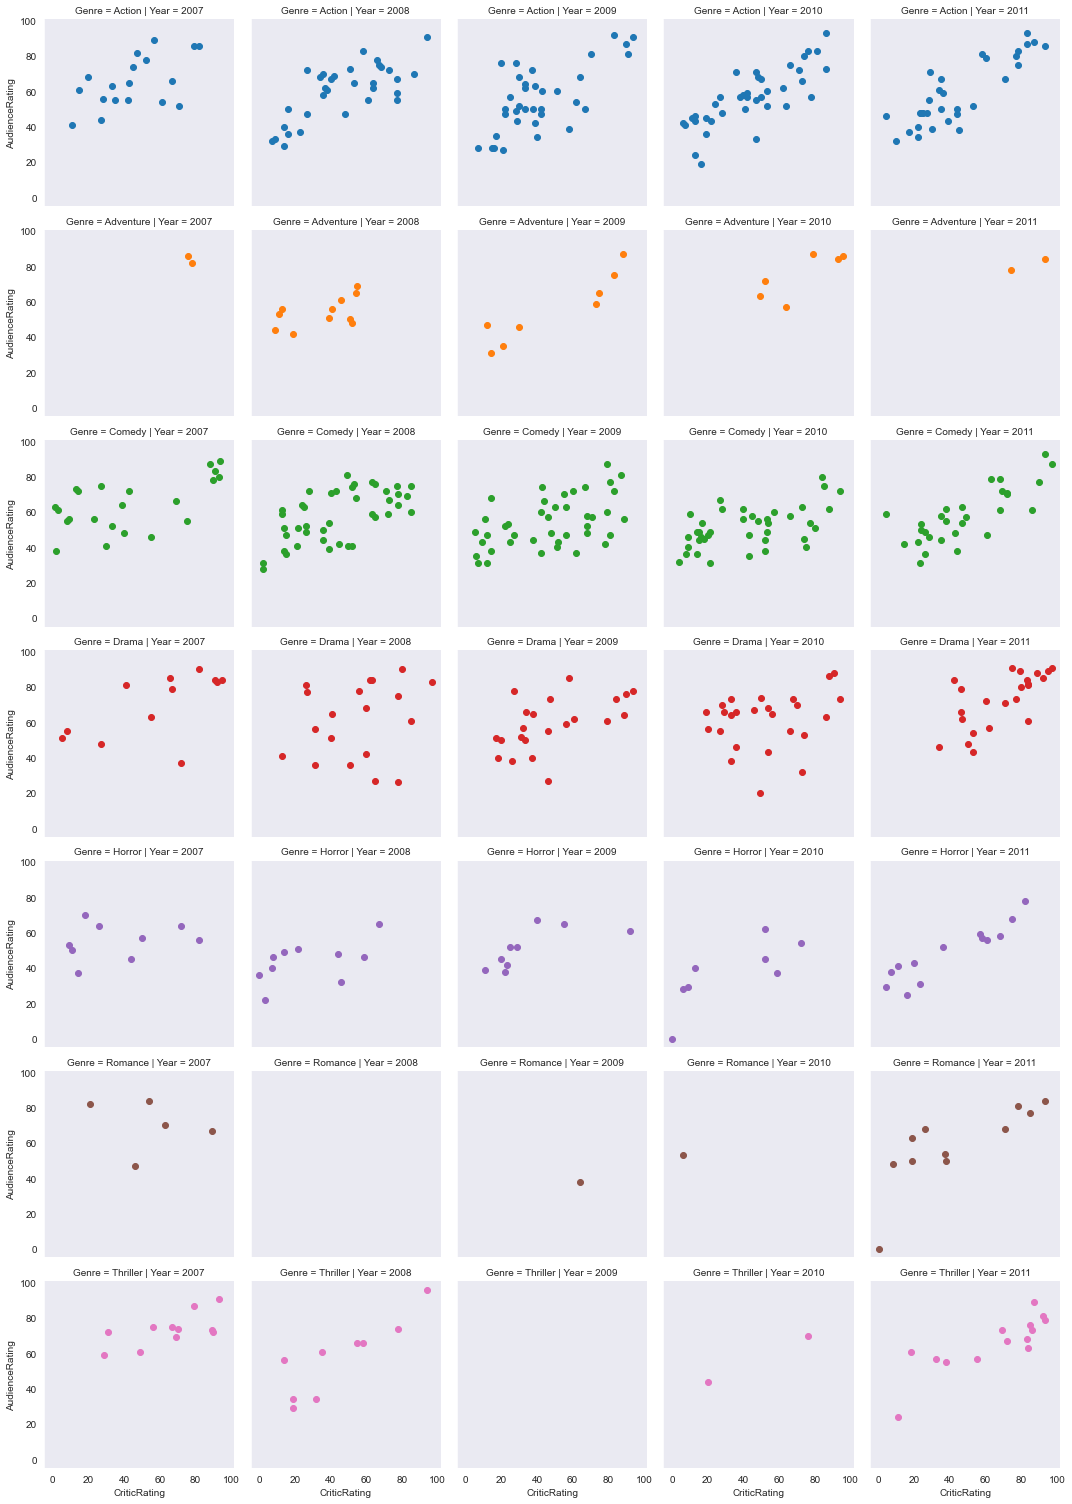

In [27]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

In [29]:
kws

{'s': 50, 'linewidth': 0.5, 'edgecolor': 'black'}

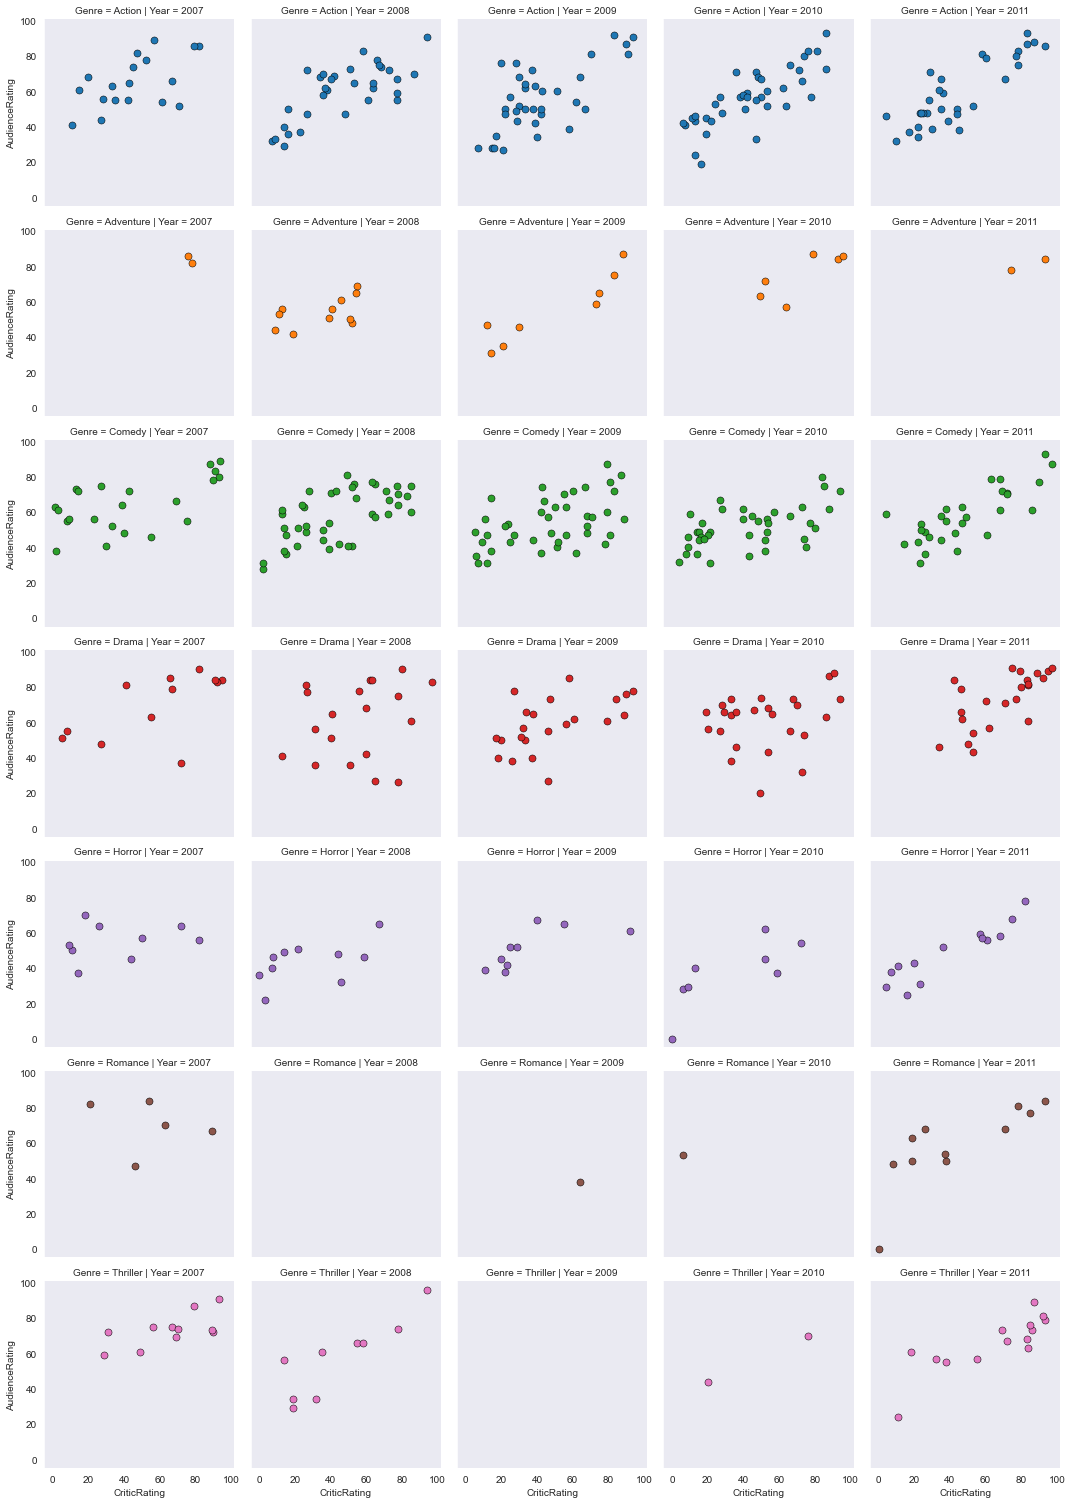

In [30]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

---

In [31]:
# coordinates and diagonals

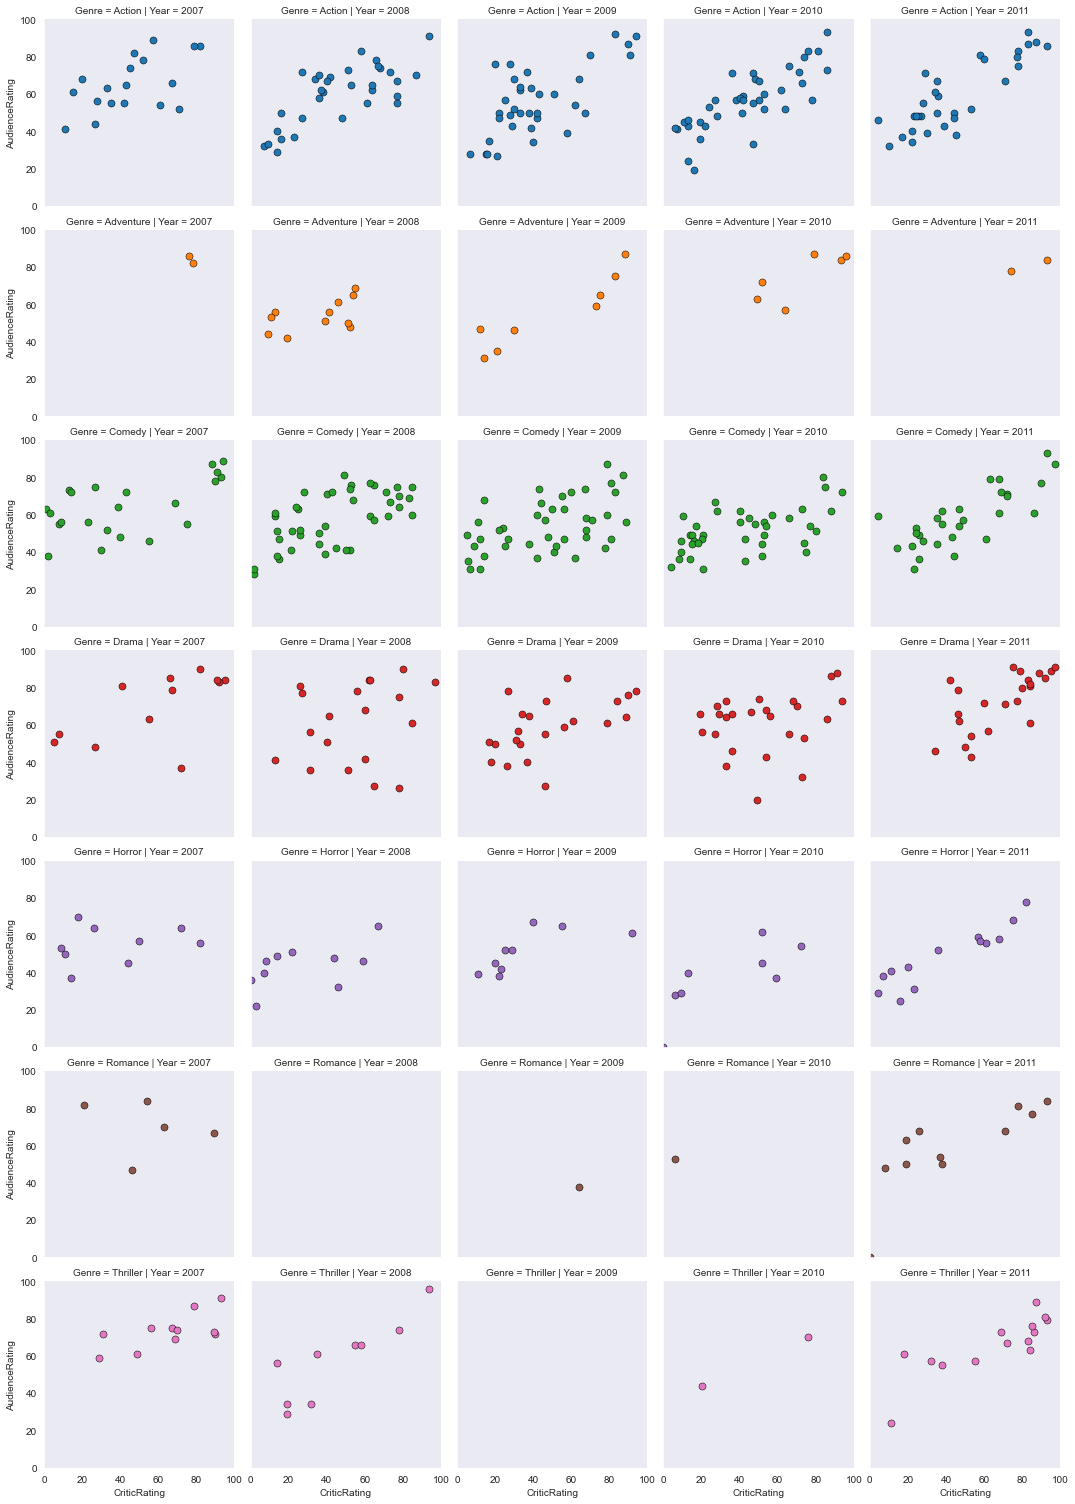

In [32]:
# controlling axes and adding diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))

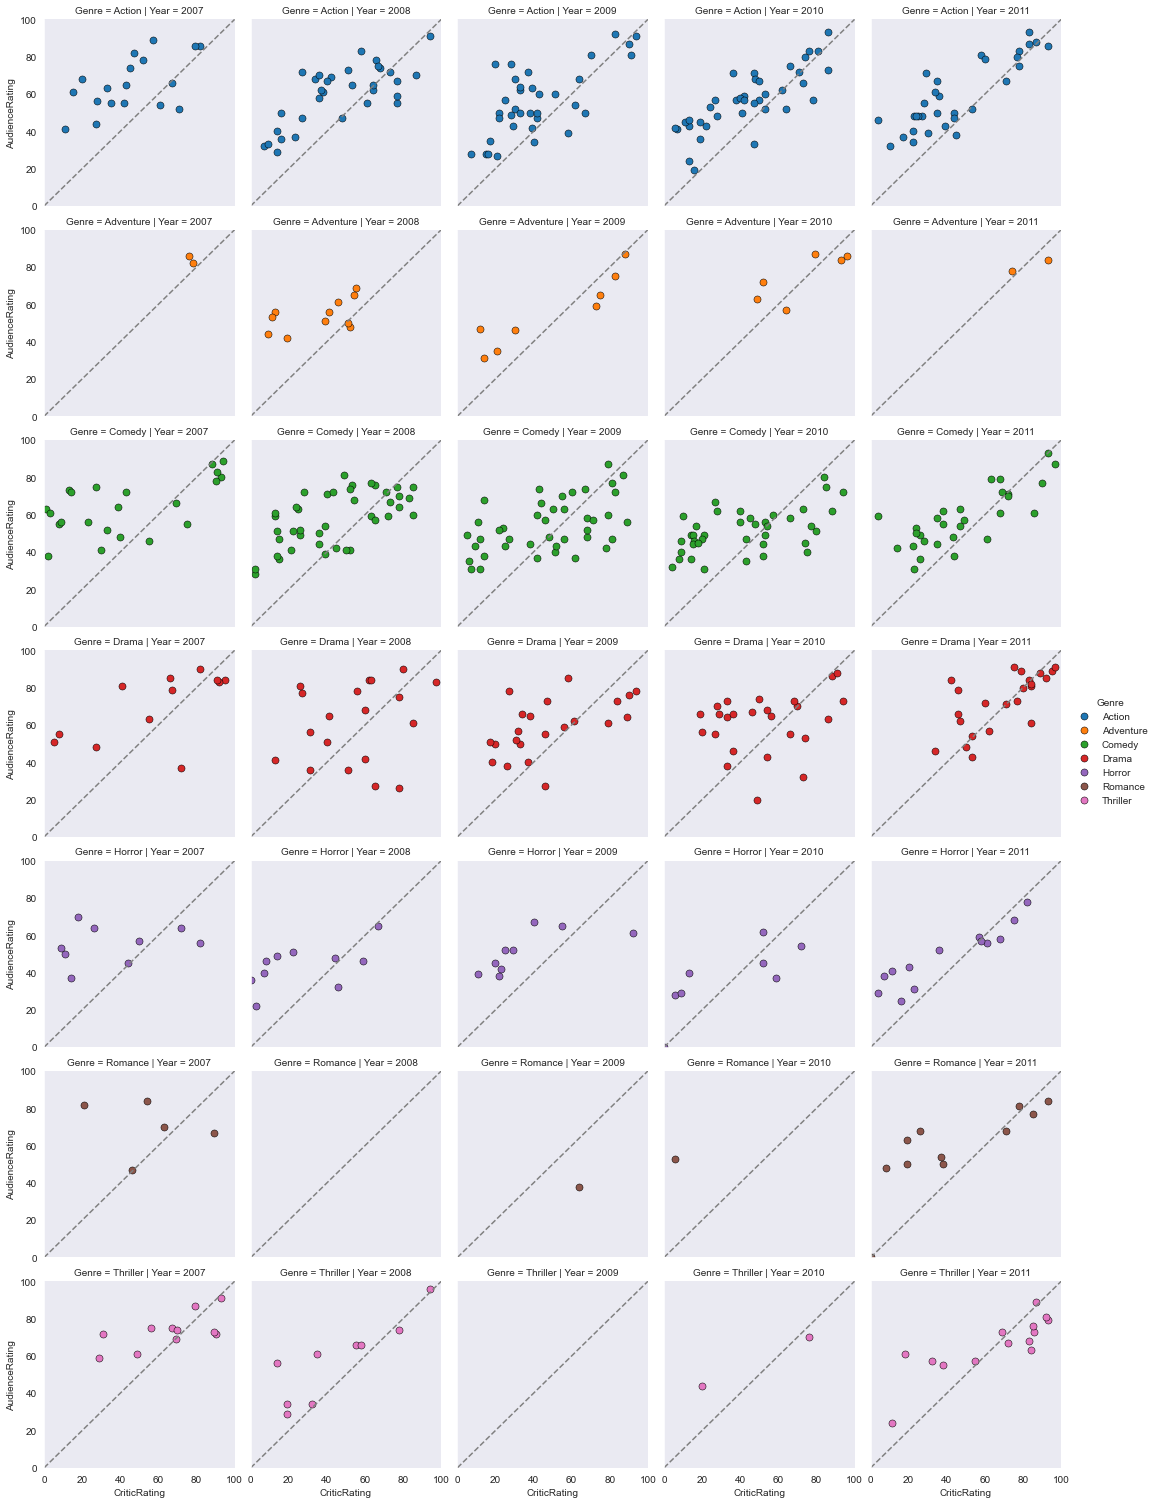

In [33]:
# for diagonals, you need to create a loop
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0, 100), (0,100), c="gray", ls="--")
g.add_legend()

---

In [34]:
# Building dashboards 

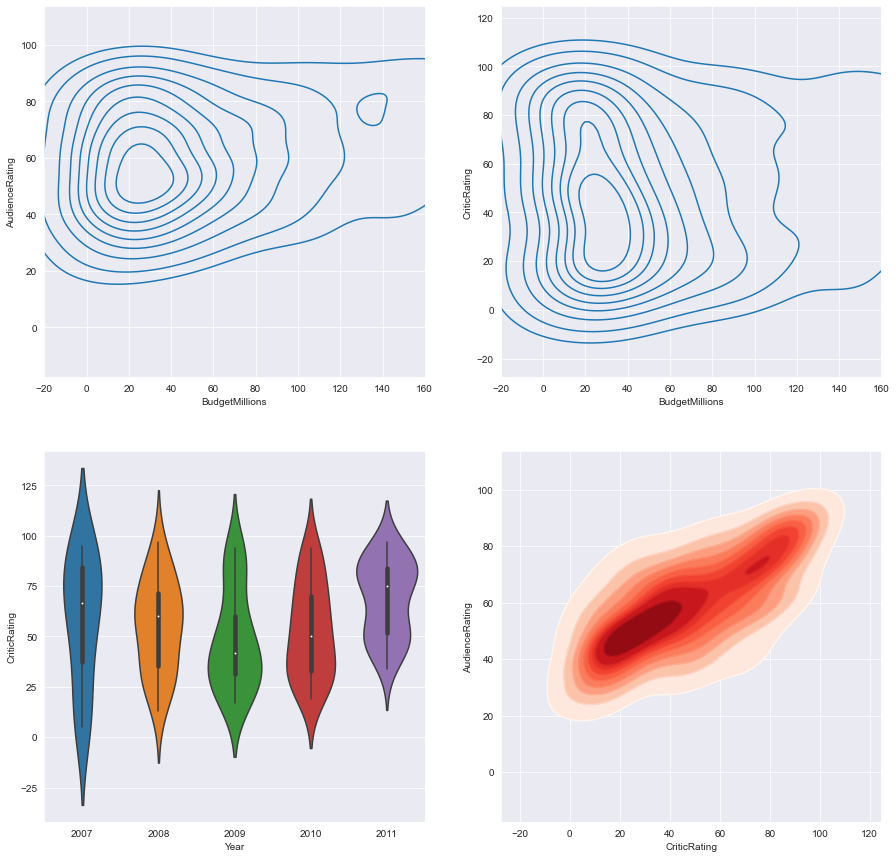

In [35]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 2, figsize =(15, 15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[0,1])
z1 = sns.violinplot(data = movies[movies.Genre == 'Drama'], x = 'Year', y = 'CriticRating', ax = axes[1,0])
k3 =sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest = False, cmap = 'Reds', ax = axes[1,1])
k3b =sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap = 'Reds', ax = axes[1,1])
k1.set(xlim = (-20 , 160))
k2.set(xlim = (-20 , 160))
plt.show()

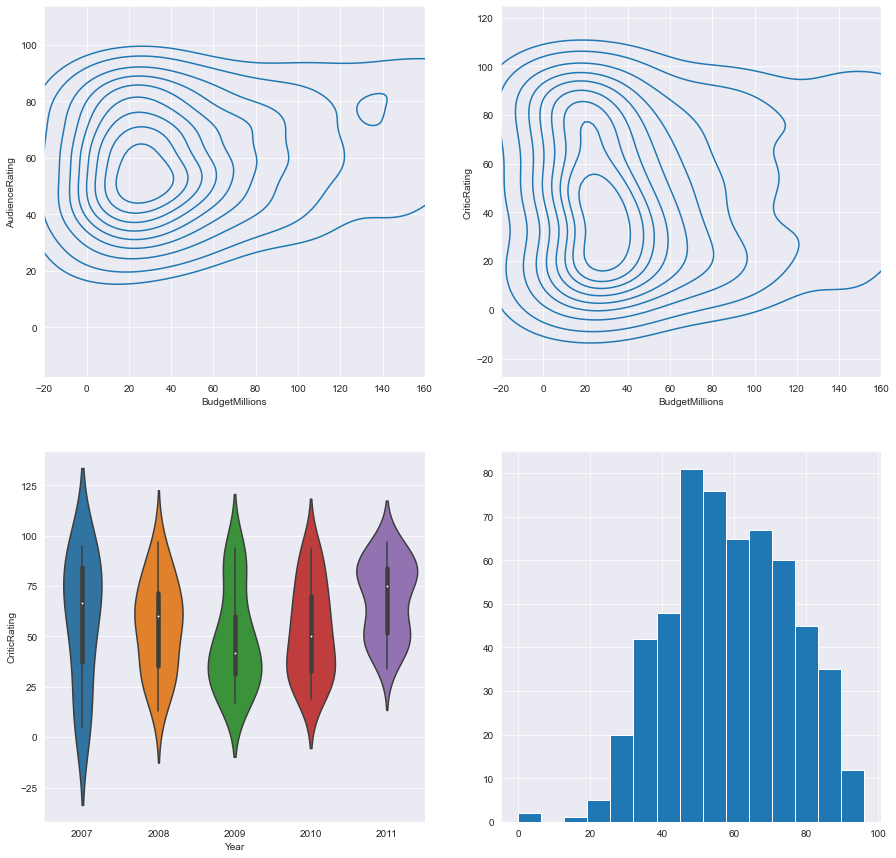

In [36]:
# to build a dashboard without seaborn
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 2, figsize =(15, 15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[0,1])
z1 = sns.violinplot(data = movies[movies.Genre == 'Drama'], x = 'Year', y = 'CriticRating', ax = axes[1,0])
axes[1,1].hist(movies.AudienceRating, bins = 15) # because its not seaborn
k1.set(xlim = (-20 , 160))
k2.set(xlim = (-20 , 160))
plt.show()

---

In [37]:
# styling dashboard

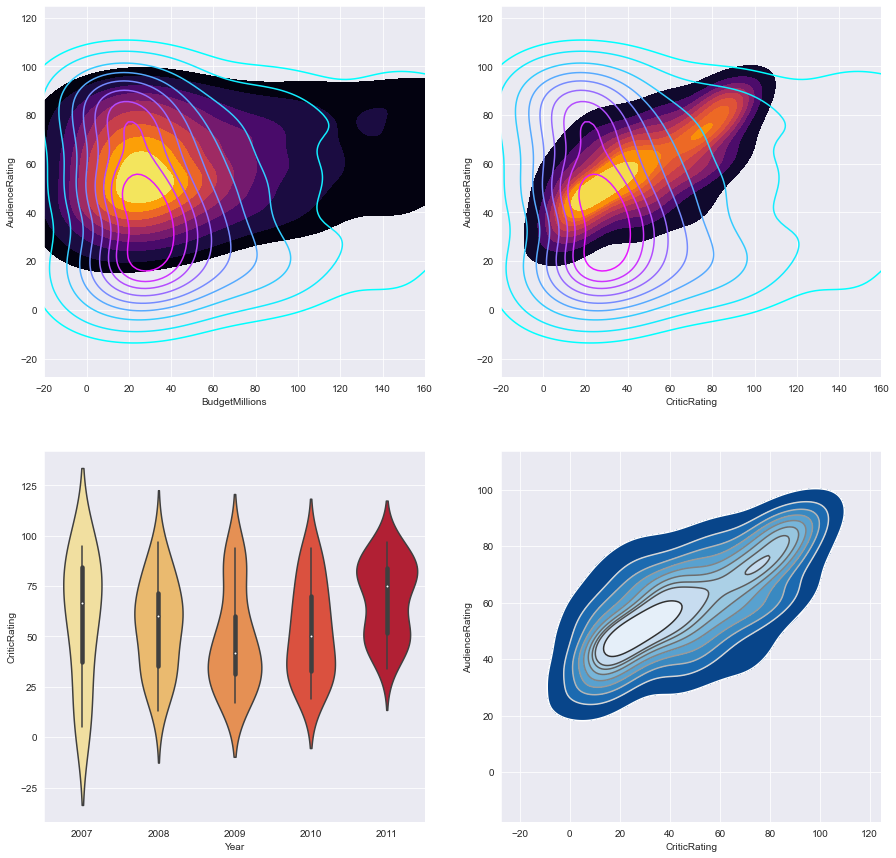

In [39]:
f, axes = plt.subplots(2, 2, figsize =(15, 15))
#plot[0,0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade = True, shade_lowest = False, cmap = 'inferno', ax = axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap = 'cool', ax = axes[0,0])
#plot[0,1]
k2 =sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest = False, cmap = 'inferno', ax = axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap = 'cool', ax = axes[0,1])
#plot[1,0]
z1 = sns.violinplot(data = movies[movies.Genre == 'Drama'], x = 'Year', y = 'CriticRating', ax = axes[1,0], palette = 'YlOrRd')
#plot[1,1]
k3 =sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest = False, cmap = 'Blues_r', ax = axes[1,1])
k3b =sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap = 'gist_gray_r', ax = axes[1,1])
k1.set(xlim = (-20 , 160))
k2.set(xlim = (-20 , 160))
plt.show()